In [1]:
import pandas as pd
import plotly.graph_objs as go

In [23]:
# read in the data

df = pd.read_csv("../assets/COVID19_state.csv")
df.shape

(51, 27)

In [24]:
# each row is a state
df.head()

,State,Abbr,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,AK,620170,17057,84,734002,1.2863,0.4081,119,59687,...,21,11064,6.4,1,26.6,66.0,0.36,0.39,0.25,3/19/20
1,Alabama,AL,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,...,101,7281,8.1,1,62.8,59.0,0.33,0.37,0.31,3/16/20
2,Arkansas,AR,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,...,88,7408,7.1,0,60.4,56.2,0.34,0.37,0.30,3/17/20
3,Arizona,AZ,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,...,83,6452,9.7,1,60.3,89.8,0.33,0.36,0.30,3/16/20
4,California,CA,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,...,359,7549,12.8,9,59.4,95.0,0.33,0.40,0.26,3/19/20


In [25]:
# missing data?
df.isnull().sum()

State                  0
Abbr                   0
Tested                 0
Infected               0
Deaths                 0
Population             0
Pop Density            0
Gini                   0
ICU Beds               0
Income                 0
GDP                    0
Unemployment           0
Sex Ratio              0
Smoking Rate           0
Flu Deaths             0
Respiratory Deaths     0
Physicians             0
Hospitals              0
Health Spending        0
Pollution              0
Med-Large Airports     0
Temperature            0
Urban                  0
Age 0-25               0
Age 26-54              0
Age 55+                0
School Closure Date    3
dtype: int64

In [26]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns.remove('School Closure Date')
# list_of_columns.remove('category')
# list_of_columns.remove('code')
list_of_columns

['State',
 'Abbr',
 'Tested',
 'Infected',
 'Deaths',
 'Population',
 'Pop Density',
 'Gini',
 'ICU Beds',
 'Income',
 'GDP',
 'Unemployment',
 'Sex Ratio',
 'Smoking Rate',
 'Flu Deaths',
 'Respiratory Deaths',
 'Physicians',
 'Hospitals',
 'Health Spending',
 'Pollution',
 'Med-Large Airports',
 'Temperature',
 'Urban',
 'Age 0-25',
 'Age 26-54',
 'Age 55+']

In [27]:
df_small = df[['State','Abbr','Tested','Infected','Deaths']]
df_small

,State,Abbr,Tested,Infected,Deaths
0,Alaska,AK,620170,17057,84
1,Alabama,AL,1356420,194892,2973
2,Arkansas,AR,1363429,113641,1985
3,Arizona,AZ,1792602,248139,5982
4,California,CA,18912501,930628,17672
5,Colorado,CO,2034795,109910,2105
6,Connecticut,CT,2367994,73858,4627
7,District of Columbia,DC,528174,17438,647
8,Delaware,DE,565983,25311,710
9,Florida,FL,10126764,801371,17043


In [9]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
# go.Format
go.Figure


plotly.graph_objs._figure.Figure

In [28]:
data=go.Choropleth(
    locations=df_small['Abbr'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = df_small['Infected'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                        'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                        'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
                        'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
                        'WI', 'WV', 'WY'], dtype=object),
    'z': array([ 17057, 194892, 113641, 248139, 930628, 109910,  73858,  17438,  25311,
                801371, 362921,  15367, 123372,  65088, 429761, 185185,  89227, 109670,
                187995, 160549, 146995,   6799, 204326, 153620, 188186, 120865,  34252,
                278028,  46015,  71666,  11320, 240997,  47232, 102114, 511368, 221909,
                125195,  45978, 211996,  34120, 17891

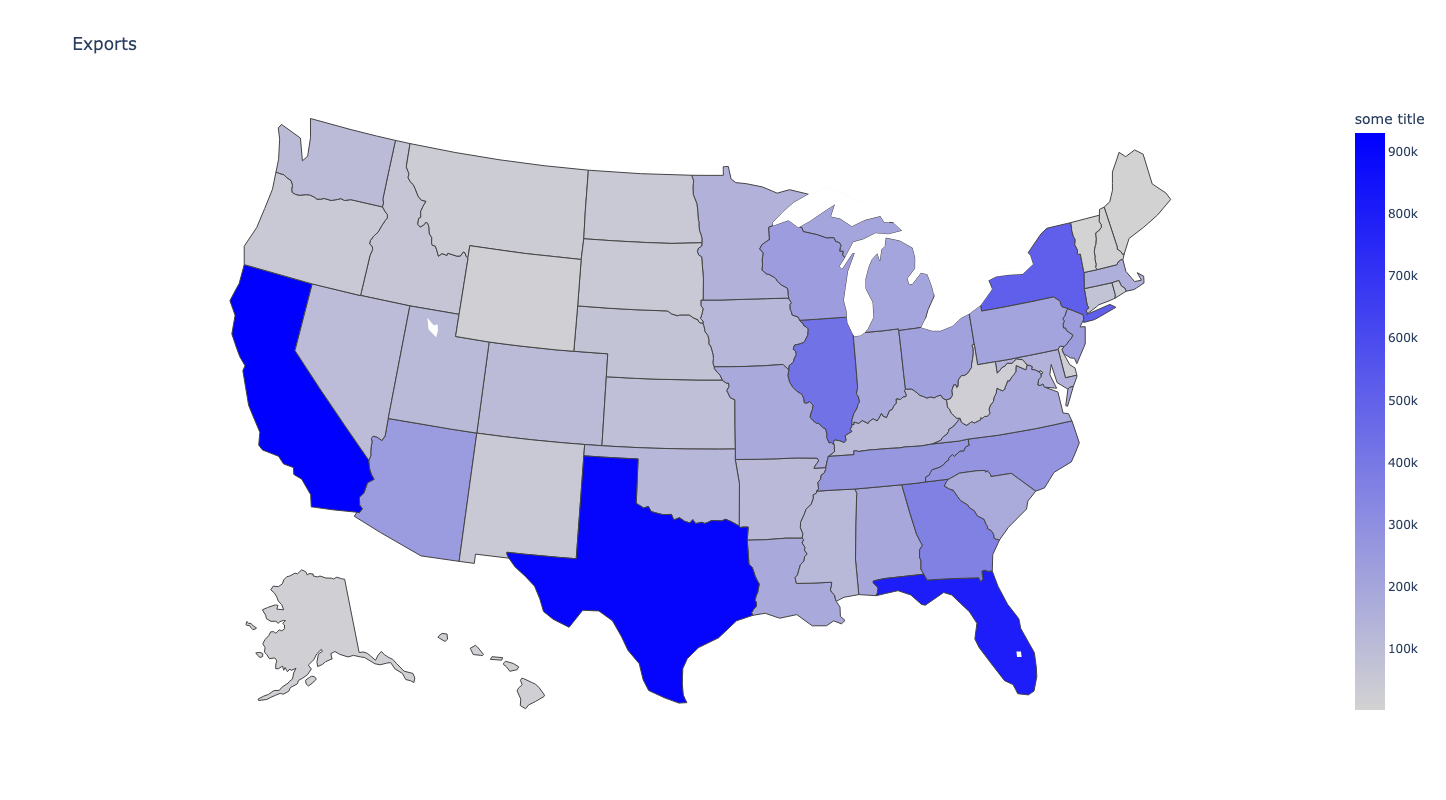

In [29]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'Exports',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('iowa-corn.html')
fig

In [36]:
# make a function that can intake any varname and produce a map.
def make_figure(varname):
    myheading1 = f"Wow! That's a lot of {varname}!"
    mygraphtitle = f'COVID19 {varname} number, by state'
    mycolorscale = 'ylorrd' # Note: The error message will list possible color scales.
    mycolorbartitle = "# of cases"

    data=go.Choropleth(
        locations=df['Abbr'], # Spatial coordinates
        locationmode = 'USA-states', # set of locations match entries in `locations`
        z = df[varname].astype(float), # Data to be color-coded
        colorscale = mycolorscale,
        colorbar_title = mycolorbartitle,
    )


    fig = go.Figure(data)
    fig.update_layout(
        title_text = mygraphtitle,
        geo_scope='usa',
        width=1200,
        height=800
    )
    return fig

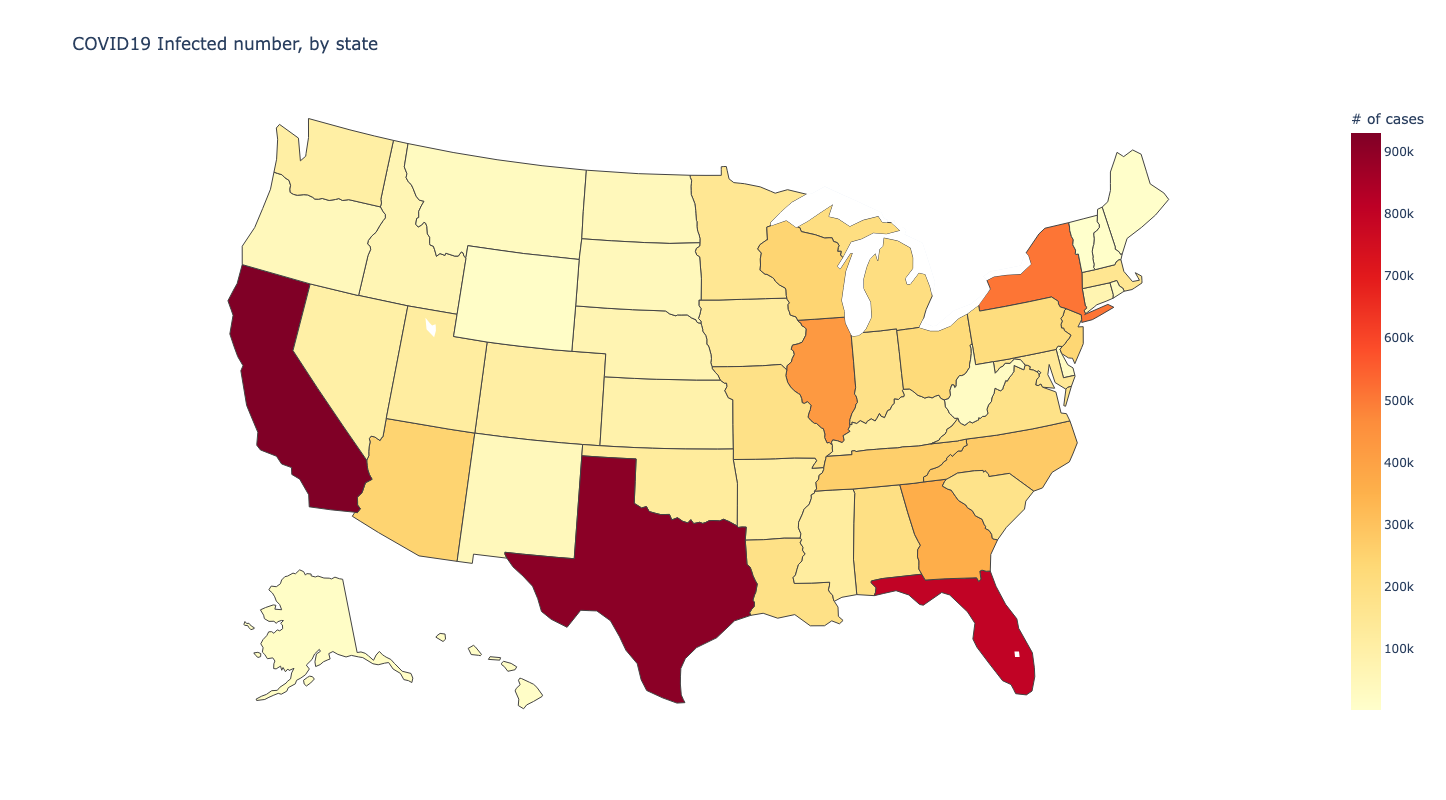

In [37]:
fig=make_figure('Infected')
fig